In [2]:
!pip3 install -U ucimlrepo 

# Import the libraries needed
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline  

import hopsworks
import pandas as pd

from ucimlrepo import fetch_ucirepo 


C:\Users\MAL Sevenhuijsen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Get the data
red_df  = pd.read_csv('./data/winequality-red.csv', sep=';')
white_df = pd.read_csv('./data/winequality-white.csv', sep=';')

# Combine the data and add a column feature for the type of wine
# White is 0 red is 1
white_df['type'] = 0
red_df['type'] = 1

# Add the length of red to the indices in white_df
white_df.index = white_df.index + len(red_df)

wine_df = pd.concat([red_df, white_df])
wine_df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [4]:
# See if there is missing data
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [5]:
# Look at the distribution of each feature
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [6]:
# Look at the different counts of outcome variable
wine_df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

# Exploratory Data Analysis

451


See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for

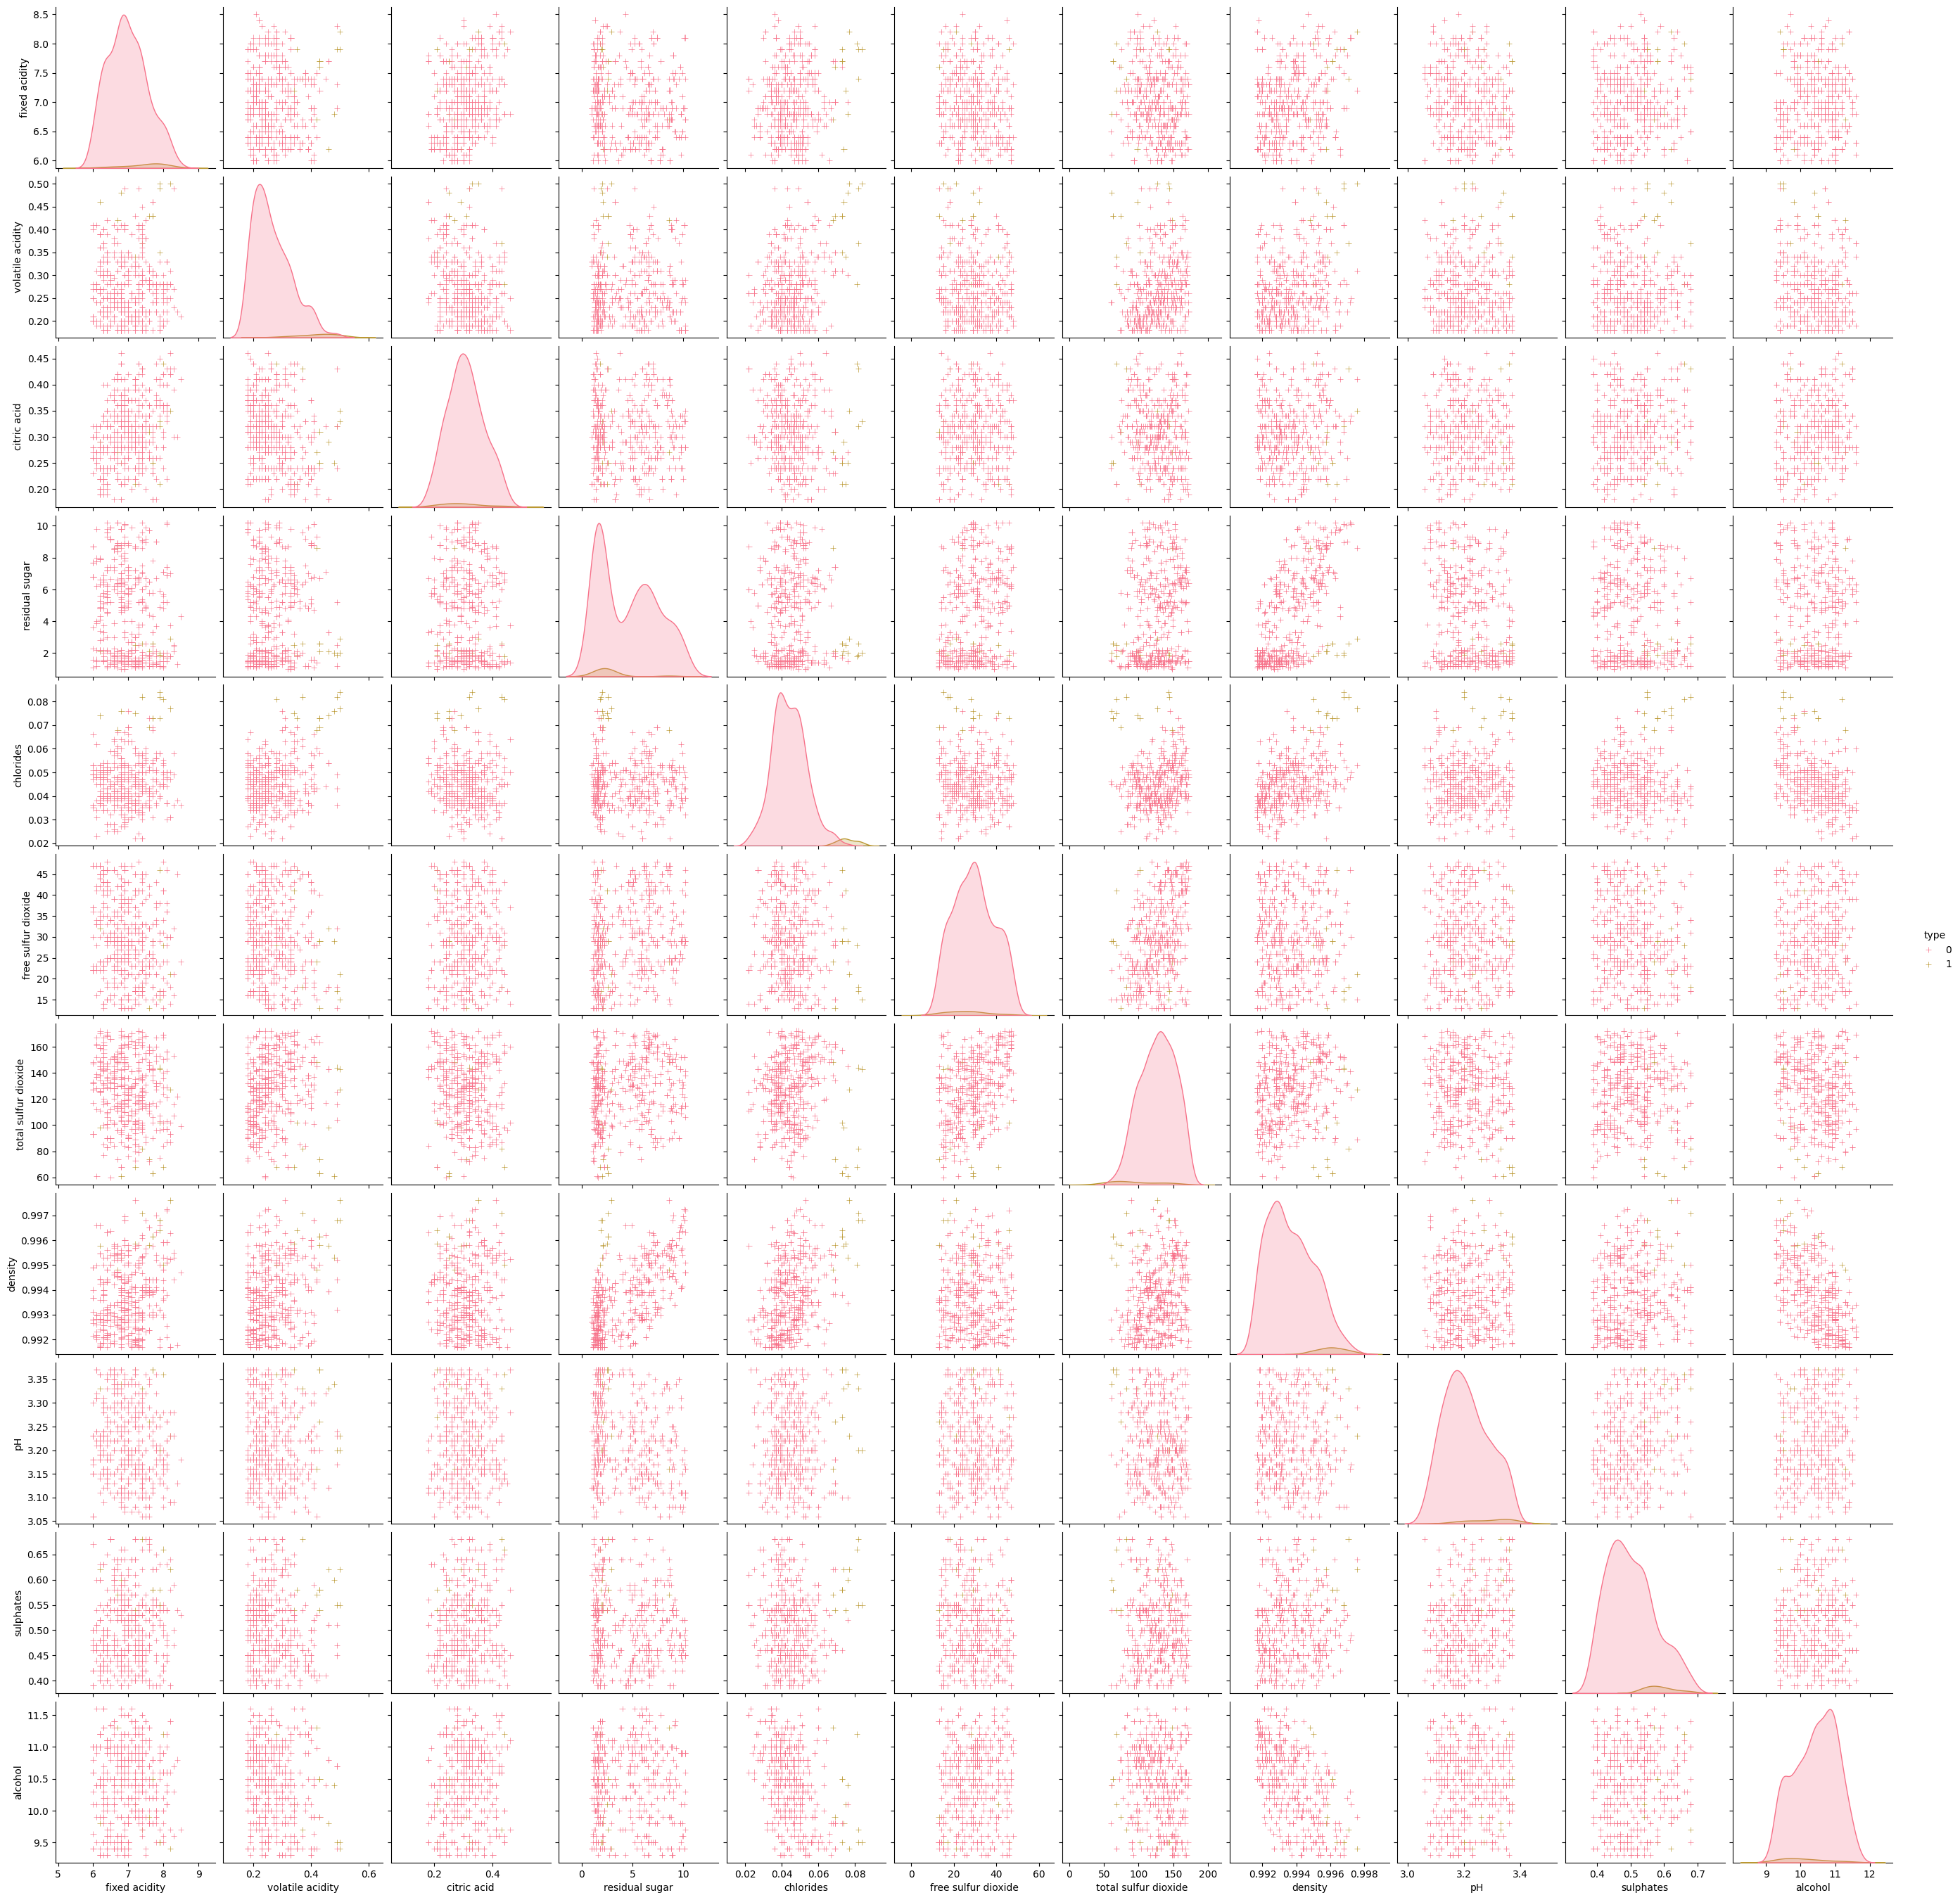

In [7]:
# We want to see correlations between different features to see if they are redundant or not
# For this we filter out only values that are more than one standard deviation  away from the mean
explore_wine_df = wine_df.copy()

# Drop the quality as it is the outcome variable
explore_wine_df = explore_wine_df.drop(['quality'], axis=1)

explore_min = wine_df.mean() - wine_df.std()
explore_max = wine_df.mean() + wine_df.std()


for i in range(len(explore_wine_df.columns)):
    # Do not do this for the type column
    if i == (len(explore_wine_df.columns) - 1):
        break
    
    # Filter out values that are more than one standard deviation away from the mean
    explore_wine_df = explore_wine_df[(explore_wine_df[explore_wine_df.columns[i]] > explore_min[i]) & (explore_wine_df[explore_wine_df.columns[i]] < explore_max[i])]
    
print(len(explore_wine_df))
    
    
g = sns.pairplot(explore_wine_df, hue='type', markers='+')
plt.show()

In [8]:
# We do not drop anything as of now since there are minor correlations but nothing too strong

2023-11-14 14:30:13,308 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-14 14:30:13,326 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


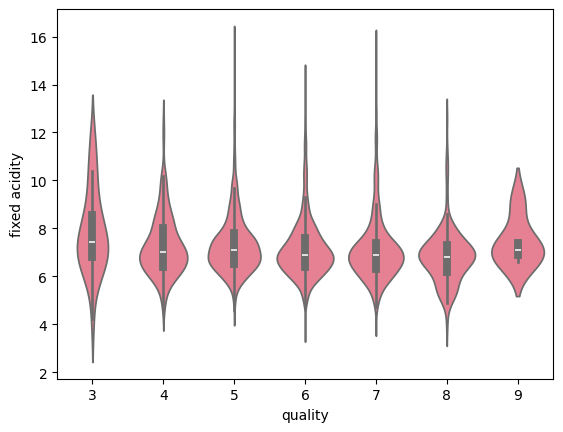

2023-11-14 14:30:13,673 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-14 14:30:13,673 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


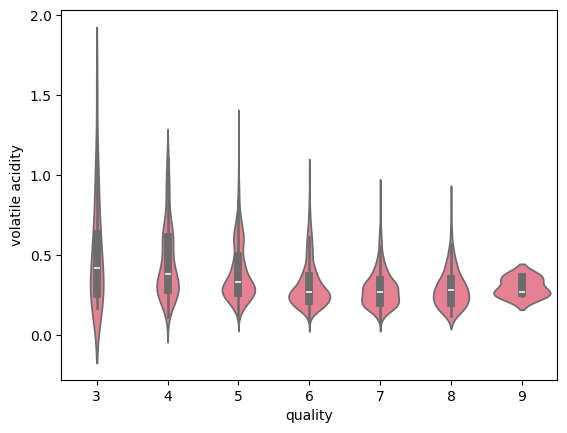

2023-11-14 14:30:13,960 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-14 14:30:13,989 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


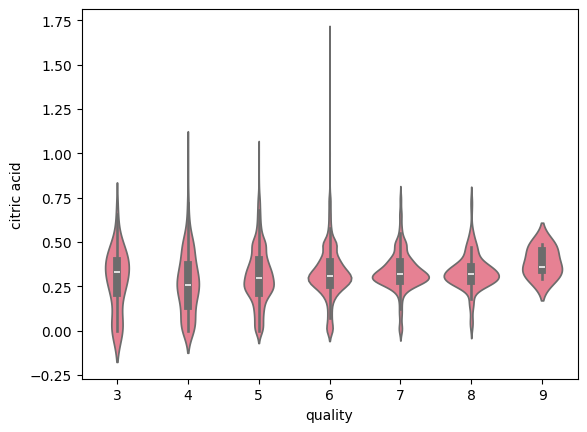

2023-11-14 14:30:14,486 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-14 14:30:14,497 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


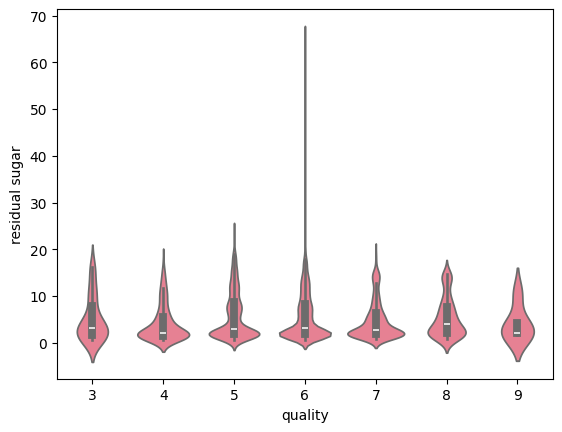

2023-11-14 14:30:14,752 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-14 14:30:14,770 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


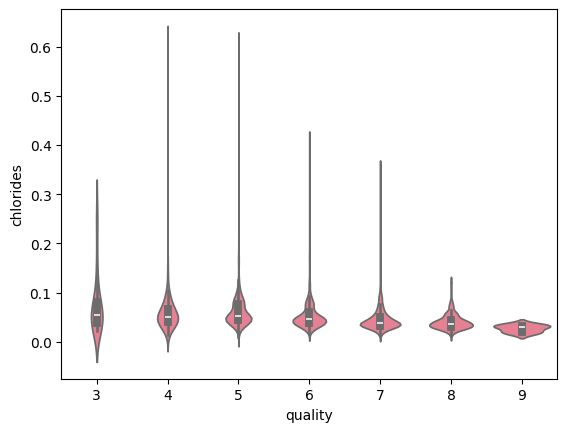

2023-11-14 14:30:15,606 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-14 14:30:15,653 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


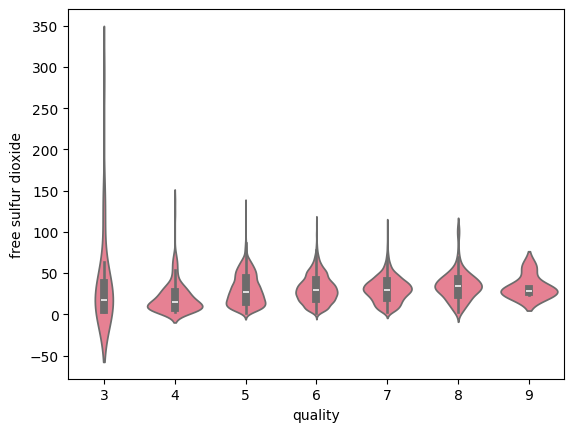

2023-11-14 14:30:16,113 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-14 14:30:16,142 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


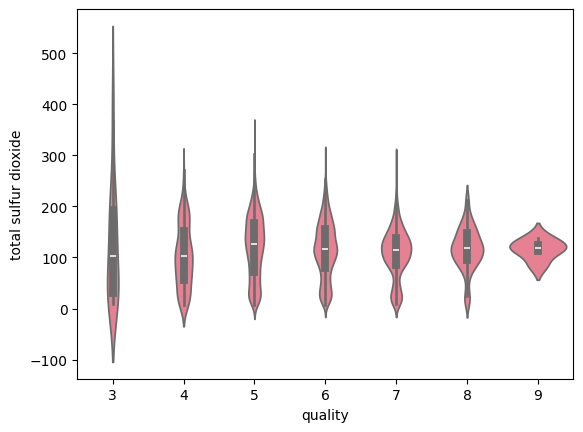

2023-11-14 14:30:16,457 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-14 14:30:16,473 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


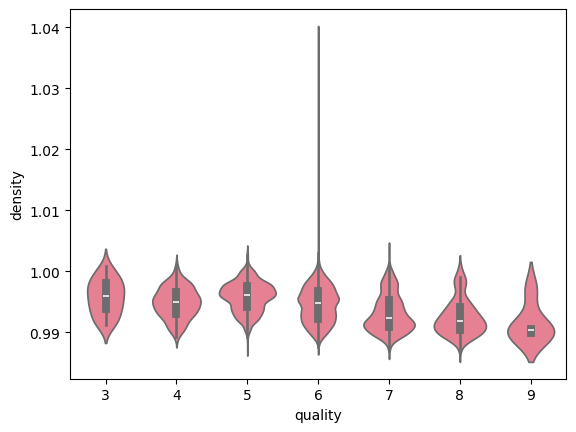

2023-11-14 14:30:16,703 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-14 14:30:16,703 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


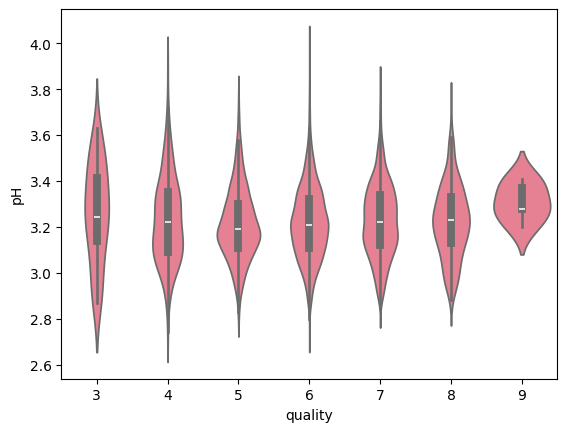

2023-11-14 14:30:16,935 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-14 14:30:16,952 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


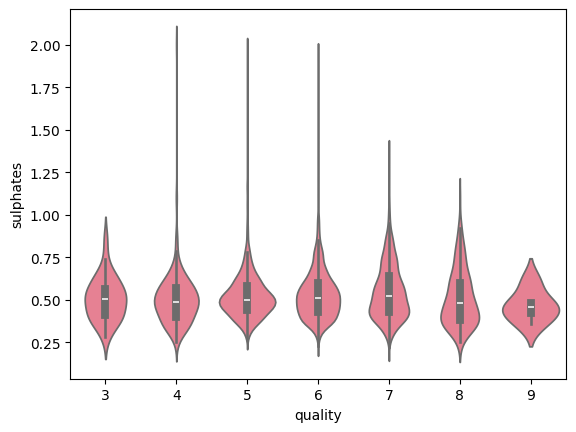

2023-11-14 14:30:17,153 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-14 14:30:17,175 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


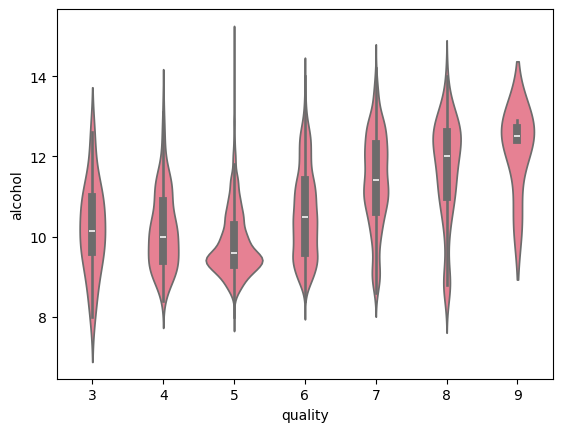

In [9]:
# get the column names
cols = wine_df.columns.tolist()
 
# See for each of 'fixed acidity',  'volatile acidity',  'citric acid',  'residual sugar',  'chlorides',  'free sulfur dioxide',  'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type' the distribution of the outcome variable
for col in cols[:-2]:
    sns.violinplot(x='quality', y=col, data=wine_df)
    plt.show()

In [10]:
# We upload the data to the feature store
project = hopsworks.login()
fs = project.get_feature_store()

# Make the features lower case
wine_df.columns = wine_df.columns.str.lower()

# Replace the spaces in the column names by underscores
wine_df.columns = wine_df.columns.str.replace(' ', '_')

wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=1,
    primary_key=wine_df.columns.tolist(), 
    description="Wine dataset")
wine_fg.insert(wine_df)

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/194708
Connected. Call `.close()` to terminate connection gracefully.
2023-11-14 14:30:19,720 INFO: 	13 expectation(s) included in expectation_suite.
Validation succeeded.
Validation Report saved successfully, explore a summary at https://c.app.hopsworks.ai:443/p/194708/fs/194627/fg/221537


Uploading Dataframe: 100.00% |██████████| Rows 6497/6497 | Elapsed Time: 00:11 | Remaining Time: 00:00


Launching job: wine_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/194708/jobs/named/wine_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x196b52ba4d0>,
 {
   "success": true,
   "meta": {
     "great_expectations_version": "0.14.13",
     "expectation_suite_name": "wine_dimensions",
     "run_id": {
       "run_time": "2023-11-14T13:30:19.720970+00:00",
       "run_name": null
     },
     "batch_kwargs": {
       "ge_batch_id": "f4952a65-82f1-11ee-9efe-84fdd1fd6a91"
     },
     "batch_markers": {},
     "batch_parameters": {},
     "validation_time": "20231114T133019.720970Z",
     "expectation_suite_meta": {
       "great_expectations_version": "0.14.13"
     }
   },
   "evaluation_parameters": {},
   "statistics": {
     "evaluated_expectations": 13,
     "successful_expectations": 13,
     "unsuccessful_expectations": 0,
     "success_percent": 100.0
   },
   "results": [
     {
       "result": {
         "element_count": 6497,
         "missing_count": 0,
         "missing_percent": 0.0,
         "unexpected_count": 0,
         "unexpected_percent": 0.0,
         "unexpected_percent_total"

In [11]:
from great_expectations.core import ExpectationSuite, ExpectationConfiguration

def expect(suite, column, min_val, max_val):
    suite.add_expectation(
    ExpectationConfiguration(
        expectation_type="expect_column_values_to_be_between",
        kwargs={
            "column":column, 
            "min_value":min_val,
            "max_value":max_val,
        }
    )
)

In [12]:
suite = ExpectationSuite(expectation_suite_name="wine_dimensions")

# We take the minimal and maximal value of each feature from the data exploration in wine_df as the boundaries for the expectations
wine_df_describe = wine_df.describe()
for col in wine_df_describe.columns:
    expect(suite, col, wine_df_describe[col]['min'], wine_df_describe[col]['max'])

wine_fg.save_expectation_suite(expectation_suite=suite, validation_ingestion_policy="STRICT")    

RestAPIError: Metadata operation error: (url: https://c.app.hopsworks.ai/hopsworks-api/api/project/194708/featurestores/194627/featuregroups/221537/expectationsuite). Server response: 
HTTP code: 409, HTTP reason: Conflict, body: b'{"errorCode":270208,"errorMsg":"An expectation suite is already attached to this feature group. Either update the existing suite via the update endpoint or delete it first."}', error code: 270208, error msg: An expectation suite is already attached to this feature group. Either update the existing suite via the update endpoint or delete it first., user msg: 

In [38]:
wine_df.describe()

#I want the mean and standard deviation for each feature for all the qualities
for type in wine_df['type'].unique():
    for q in range(3,10):
        print(q,",",end="")
        for col in wine_df.columns:
            if (col != 'quality') & (col != 'type'):
                print(wine_df[(wine_df['quality'] == q) & (wine_df['type'] == type)][col].mean(),",",wine_df[(wine_df['quality'] == q )& (wine_df['type'] == type)][col].std(),",", end="")
        print("\n")



3 ,8.36 , 1.7708754896942924 ,0.8844999999999998 , 0.3312556079189872 ,0.17099999999999999 , 0.250663563810583 ,2.6350000000000002 , 1.4015963121463406 ,0.12250000000000001 , 0.06624072262085715 ,11.0 , 9.763879010584539 ,24.9 , 16.828877297999146 ,0.9974640000000001 , 0.0020018447048215696 ,3.3979999999999997 , 0.14405245958022062 ,0.5700000000000001 , 0.12202003478482082 ,9.955000000000002 , 0.8180091007372037 ,

4 ,7.779245283018868 , 1.6266244532024496 ,0.6939622641509432 , 0.2201100216381441 ,0.1741509433962264 , 0.20103036473918515 ,2.6943396226415097 , 1.7894364276475883 ,0.09067924528301886 , 0.07619175545568856 ,12.264150943396226 , 9.025926211573964 ,36.24528301886792 , 27.583374075684237 ,0.9965424528301886 , 0.0015751689844150044 ,3.381509433962264 , 0.18144077468138503 ,0.5964150943396227 , 0.23939100892137696 ,10.265094339622639 , 0.934776037844832 ,

5 ,8.167254038179149 , 1.563988004435059 ,0.5770411160058737 , 0.16480118525037726 ,0.2436857562408223 , 0.180002650110538

In [32]:
for type in wine_df["type"].unique():
    print(type)

1
0
